In [30]:
import numpy as np
import wave
from scipy import signal as sg
import matplotlib.pyplot as plt
import easygui as g
import sys

In [31]:
#低通滤波 lowpass
def low_pass_filter_fir(f0, Q=1., fs=192000):
    """
    根据PEQ参数设计二阶IIR数字低通滤波器，默认采样率192k
    :param f0: 中心频率
    :param Q: 峰值带宽
    :param fs: 系统采样率
    :return: 双二阶滤波器系数
    """
    w0 = 2 * np.pi * f0 / fs 
    alpha = np.sin(w0) / (2 * Q)
    b0 = (1 - np.cos(w0)) / 2
    b1 = 1 - np.cos(w0)
    b2 = (1 - np.cos(w0)) / 2
    a0 = 1 + alpha
    a1 = -2 * np.cos(w0)
    a2 = 1 - alpha
    b = np.array([b0, b1, b2])
    a = np.array([a0, a1, a2])
    #h = np.hstack((b / a[0], a / a[0]))

    return b,a

#高通滤波 highpass
def high_pass_filter_fir(f0, Q=1., fs=192000):
    """
    根据PEQ参数设计二阶IIR数字高通滤波器，默认采样率192k
    :param f0: 中心频率
    :param Q: 峰值带宽
    :param fs: 系统采样率
    :return: 双二阶滤波器系数
    """
    w0 = 2 * np.pi * f0 / fs
    alpha = np.sin(w0) / (2 * Q)

    b0 = (1 + np.cos(w0)) / 2
    b1 = -1 - np.cos(w0)
    b2 = (1 + np.cos(w0)) / 2
    a0 = 1 + alpha
    a1 = -2 * np.cos(w0)
    a2 = 1 - alpha
    b = np.array([b0, b1, b2])
    a = np.array([a0, a1, a2])

    #h = np.hstack((b / a[0], a / a[0]))

    return b,a

#低频增强滤波器 lowshelf
def low_shelf_filter_fir(f0, gain=0., Q=1., fs=192000):
    """
    根据PEQ参数设计二阶IIR数字low shelf滤波器，默认采样率192k
    :param f0: 中心频率
    :param gain: 峰值增益
    :param Q: 峰值带宽
    :param fs: 系统采样率
    :return: 双二阶滤波器系数
    """
    A = np.sqrt(10 ** (gain / 20))
    w0 = 2 * np.pi * f0 / fs
    alpha = np.sin(w0) / (2 * Q)

    b0 = A * ((A + 1) - (A - 1) * np.cos(w0) + 2 * np.sqrt(A) * alpha)
    b1 = 2 * A * ((A - 1) - (A + 1) * np.cos(w0))
    b2 = A * ((A + 1) - (A - 1) * np.cos(w0) - 2 * np.sqrt(A) * alpha)
    a0 = (A + 1) + (A - 1) * np.cos(w0) + 2 * np.sqrt(A) * alpha
    a1 = -2 * ((A - 1) + (A + 1) * np.cos(w0))
    a2 = (A + 1) + (A - 1) * np.cos(w0) - 2 * np.sqrt(A) * alpha

    b = np.array([b0, b1, b2])
    a = np.array([a0, a1, a2])

    #h = np.hstack((b / a[0], a / a[0]))

    return b,a

#高频增强滤波器 highshelf
def high_shelf_filter_fir(f0, gain=0., Q=1., fs=192000):
    """
    根据PEQ参数设计二阶IIR数字high shelf滤波器，默认采样率192k
    :param f0: 中心频率
    :param gain: 峰值增益
    :param Q: 峰值带宽
    :param fs: 系统采样率
    :return: 双二阶滤波器系数
    """
    A = np.sqrt(10 ** (gain / 20))
    w0 = 2 * np.pi * f0 / fs
    alpha = np.sin(w0) / (2 * Q)

    b0 = A * ((A + 1) + (A - 1) * np.cos(w0) + 2 * np.sqrt(A) * alpha)
    b1 = -2 * A * ((A - 1) + (A + 1) * np.cos(w0))
    b2 = A * ((A + 1) + (A - 1) * np.cos(w0) - 2 * np.sqrt(A) * alpha)
    a0 = (A + 1) - (A - 1) * np.cos(w0) + 2 * np.sqrt(A) * alpha
    a1 = 2 * ((A - 1) - (A + 1) * np.cos(w0))
    a2 = (A + 1) - (A - 1) * np.cos(w0) - 2 * np.sqrt(A) * alpha

    b = np.array([b0, b1, b2])
    a = np.array([a0, a1, a2])

    #h = np.hstack((b / a[0], a / a[0]))

    return b,a



#peak/notch滤波器
def peak_filter_fir(f0, gain=0., Q=1., fs=192000):
    """
    根据PEQ参数设计二阶IIR数字peak滤波器，默认采样率192k
    :param f0: 中心频率
    :param gain: 峰值增益，正值为peak filter,负值为notch filter
    :param Q: 峰值带宽
    :param fs: 系统采样率
    :return: 双二阶滤波器系数
    """
    A = np.sqrt(10 ** (gain / 20))
    w0 = 2 * np.pi * f0 / fs
    alpha = np.sin(w0) / (2 * Q)

    b0 = 1 + alpha * A
    b1 = -2 * np.cos(w0)
    b2 = 1 - alpha * A
    a0 = 1 + alpha / A
    a1 = -2 * np.cos(w0)
    a2 = 1 - alpha / A
    b = np.array([b0, b1, b2])
    a = np.array([a0, a1, a2])

    #h = np.hstack((b / a[0], a / a[0]))

    return b,a

In [32]:
class easyDemo:
    def guifun(self):
        # loginStatus = False
        # g.msgbox(msg="欢迎使用npc机器人，请先使用npc账号登陆~~ \n\n\n\n\n\n\n\n\n\n\n\n如有问题，请联系xxx",title="npc机器人")
        # while not loginStatus:
        #     mulRes = g.multpasswordbox('请输入您的账号密码', '商品盘点登录框', ('帐号', '密码'))
        #     if mulRes is None:
        #         sys.exit(0)
        #     if mulRes[0] == '' or mulRes[1] == '':
        #         g.msgbox('请输入完整的账号密码', ok_button="确定", title="提醒")
        #         continue
        #     account = mulRes[0]
        #     password = mulRes[1]
        #     #拿着账号密码验权
        #     if account == 'admin' and password == 'admin':
        #         g.msgbox('帐号:  ' + account + '登陆成功', ok_button="下一步",title="登陆结果")
        #         loginStatus = True
        #     else:
        #         g.msgbox('帐号:  ' + account + '登陆失败', ok_button="重新登陆")

        # userName = 'Npc'


        # g.msgbox("显示一个窗口并且显示这些文字")# 只显示一个对话框并且只有一个ok
        msg= "欢迎使用npc机器人，请选择你要做的事情?"
        title="npc机器人"       # 在左上角的 标题旷里面
        choices=['读取wav文件','----']  # 在选择框内 , 提供可选择项
        choice=g.choicebox(msg,title,choices) #  在这里 choice 可以得到上面你选择的那个选项
        if choice is None:
            sys.exit(0)

        g.msgbox("你的选择是:"+str(choice),title="npc机器人",ok_button="下一步") # 打印出来

        viewType = ['FIR滤波器', 'IIR滤波器']
        viewChose_lbq = g.choicebox(msg='请选择请选择滤波类型',choices=viewType,title="npc机器人")
        if viewChose_lbq is None:
            sys.exit(0)
        if viewChose_lbq == 'FIR滤波器':
            # 输入商品编号
            viewType = ['low_pass_filter_fir', 'high_pass_filter_fir','low_shelf_filter_fir','high_shelf_filter_fir','peak_filter_fir']
            viewChose_lx = g.choicebox(msg='开始执行',choices=viewType,title="npc机器人")
            if viewChose_lx is None:
                sys.exit(0)
            msg = '准入测试程序'
            title = '信息输入界面'
            if viewChose_lx in ['low_pass_filter_fir','high_pass_filter_fir']:
                filenames = ['f0','Q','fs']
                file_value = []
                file_value = g.multenterbox(msg,title,filenames)
                print(file_value)
                filepath = float(file_value[0])
                print('f0',filepath)
                micseq = float(file_value[1])
                print('Q',micseq)
                refseq = float(file_value[2])
                print('fs',refseq)
                self.viewChose_lbq=viewChose_lbq
                self.viewChose_lx=viewChose_lx
                self.filepath=filepath
                self.micseq=micseq
                self.refseq=refseq
            else:
                filenames = ['f0','gain','Q','fs']
                file_value = []
                file_value = g.multenterbox(msg,title,filenames)
                print(file_value)
                filepath = float(file_value[0])
                print('f0',filepath)
                filenames = float(file_value[1])
                print('gain',filenames)
                micseq = float(file_value[2])
                print('Q',micseq)
                refseq = float(file_value[3])
                print('fs',refseq)
                self.viewChose_lbq=viewChose_lbq
                self.viewChose_lx=viewChose_lx
                self.filepath=filepath
                self.filenames=filenames
                self.micseq=micseq
                self.refseq=refseq
            
        
            
        else:
            #获取 列表内容
            # 这里demo 就用一些测试数据
            msg = '准入测试程序'
            title = '信息输入界面'
            filenames = ['jieshu','xishu']
            file_value = []
            file_value = g.multenterbox(msg,title,filenames)
            print(file_value)
            filepath = float(file_value[0])
            print('jieshu',filepath)
            filenames = float(file_value[1])
            print('xishu',filenames)
            self.viewChose_lbq=viewChose_lbq
            self.filepath=filepath
            self.filenames=filenames
        
        

44100
10790300
(5395150, 2)
(2, 5395150)
5395150
44100
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 1.22338934e+02
 1.22338957e+02 1.22338980e+02]
<ipython-input-33-65f685e7eae6>:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)
['18000', '1', '192000']
f0 18000.0
Q 1.0
fs 192000.0


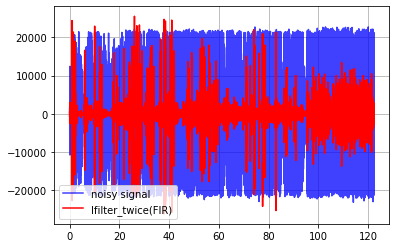

In [33]:
# 打开WAV文档
msg='浏览文件并打开'
title='测试'
#default='D:\Python练习\*'
fileType='全部文件'
filePath=g.fileopenbox(msg,title,fileType)
f = wave.open(filePath, "rb")
# 读取格式信息
# (nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
print(framerate)
#print(len(nframes))
# 读取波形数据
str_data = f.readframes(nframes)
f.close()
#将波形数据转换为数组
wave_data = np.fromstring(str_data, dtype=np.short)
print(len(wave_data))
wave_data.shape = -1, 2
print(wave_data.shape)
wave_data = wave_data.T
print(wave_data.shape)
print(nframes)
print(framerate)
time = np.arange(0, nframes) * (1.0 / framerate)
print(time)
# 绘制波形
a=easyDemo()
a.guifun()
viewChose_lbq=a.viewChose_lbq


#fir滤波器
#滤波类型选择：
if viewChose_lbq=='FIR滤波器':
    viewChose_lx=a.viewChose_lx
    micseq=a.micseq
    refseq=a.refseq
    filepath=a.filepath
    if viewChose_lx=='low_pass_filter_fir':

        b, a = low_pass_filter_fir(filepath, micseq, refseq)

    if viewChose_lx=='high_pass_filter_fir':
        b, a = high_pass_filter_fir(filepath, micseq, refseq)

    if viewChose_lx=='low_shelf_filter_fir':
        filenames=a.filenames
        b, a = low_shelf_filter_fir(filepath, filenames, micseq, refseq)

    if viewChose_lx=='high_shelf_filter_fir':
        filenames=a.filenames
        b, a = high_shelf_filter_fir(filepath, filenames, micseq, refseq)

    if viewChose_lx=='peak_filter_fir':
        filenames=a.filenames
        b, a = peak_filter_fir(filepath, filenames, micseq, refseq)

    #将过滤器应用于data。使用lfilter_zi选择过滤器的初始条件：
    zi = sg.lfilter_zi(b, a)
    z, _ = sg.lfilter(b, a, wave_data[0], zi=zi*wave_data[0][0])
    #再次应用过滤器，以与filtfilt相同的顺序过滤结果：
    z2, _ = sg.lfilter(b, a, z, zi=zi*z[0])

    #绘图
    plt.figure
    plt.plot(time, wave_data[0], 'b', alpha=0.75)
    plt.plot(time, z2, 'r')
    plt.legend(('noisy signal', 'lfilter_twice(FIR)'), loc='best')
    plt.grid(True)
    plt.show()


#iir滤波器
#创建order3低通道butterworth过滤器：
else:
    filenames=a.filenames
    filepath=a.filepath
    b, a = sg.butter(filepath, filenames)
    #使用filtfilt应用过滤器：
    y = sg.filtfilt(b, a, wave_data[0])

    #绘图
    plt.figure
    plt.plot(time, wave_data[0], 'b', alpha=0.75)
    plt.plot(time, y, 'k')
    plt.legend(('noisy signal','Butterworth Filter(IIR)'), loc='best')
    plt.grid(True)
    plt.show()